# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
previsao_renda = pd.read_csv('previsao_de_renda.csv')
previsao_renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

As duas variáveis mais correlacionadas com a renda são: Index(['tempo_emprego', 'idade'], dtype='object')


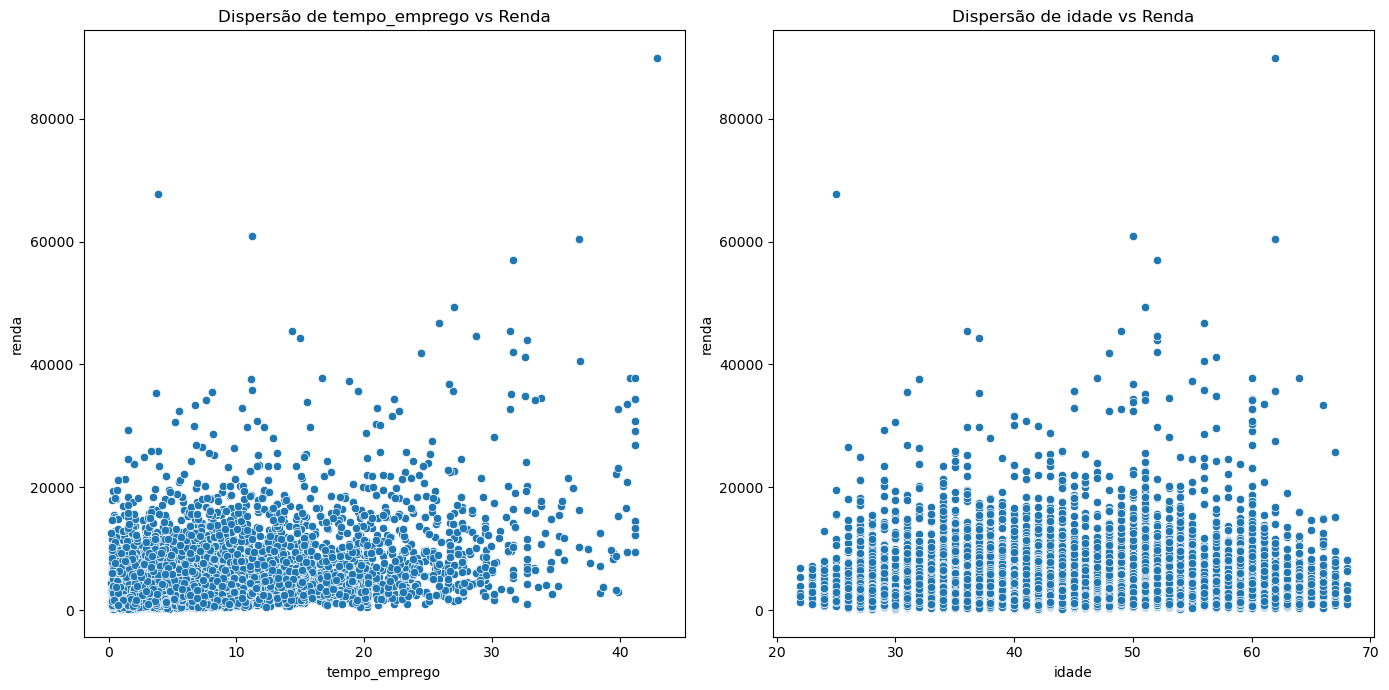

In [8]:
# Selecionar apenas as colunas numéricas
numeric_cols = previsao_renda.select_dtypes(include=[np.number])

# Calcular a correlação entre todas as variáveis numéricas e a renda
correlation_matrix = numeric_cols.corr()
renda_correlation = correlation_matrix['renda'].sort_values(ascending=False)

# Identificar as duas variáveis mais correlacionadas com renda, excluindo a própria renda
top2_vars = renda_correlation.index[1:3]  # pegar os dois primeiros índices após 'renda'
print("As duas variáveis mais correlacionadas com a renda são:", top2_vars)

# Criar um gráfico de dispersão para essas variáveis
plt.figure(figsize=(14, 7))

# Primeiro scatter plot
plt.subplot(1, 2, 1)
sns.scatterplot(data=previsao_renda, x=top2_vars[0], y='renda')
plt.title(f'Dispersão de {top2_vars[0]} vs Renda')

# Segundo scatter plot
plt.subplot(1, 2, 2)
sns.scatterplot(data=previsao_renda, x=top2_vars[1], y='renda')
plt.title(f'Dispersão de {top2_vars[1]} vs Renda')

plt.tight_layout()
plt.show()

3) Na su aopinião, há outliers na variável renda?

Sim, a variável renda parece ter outliers. Isso pode ser observado pelos pontos que estão significativamente mais altos do que a maioria dos outros pontos no gráfico de dispersão.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

As duas variáveis mais correlacionadas com o logaritmo da renda são: Index(['renda', 'tempo_emprego'], dtype='object')


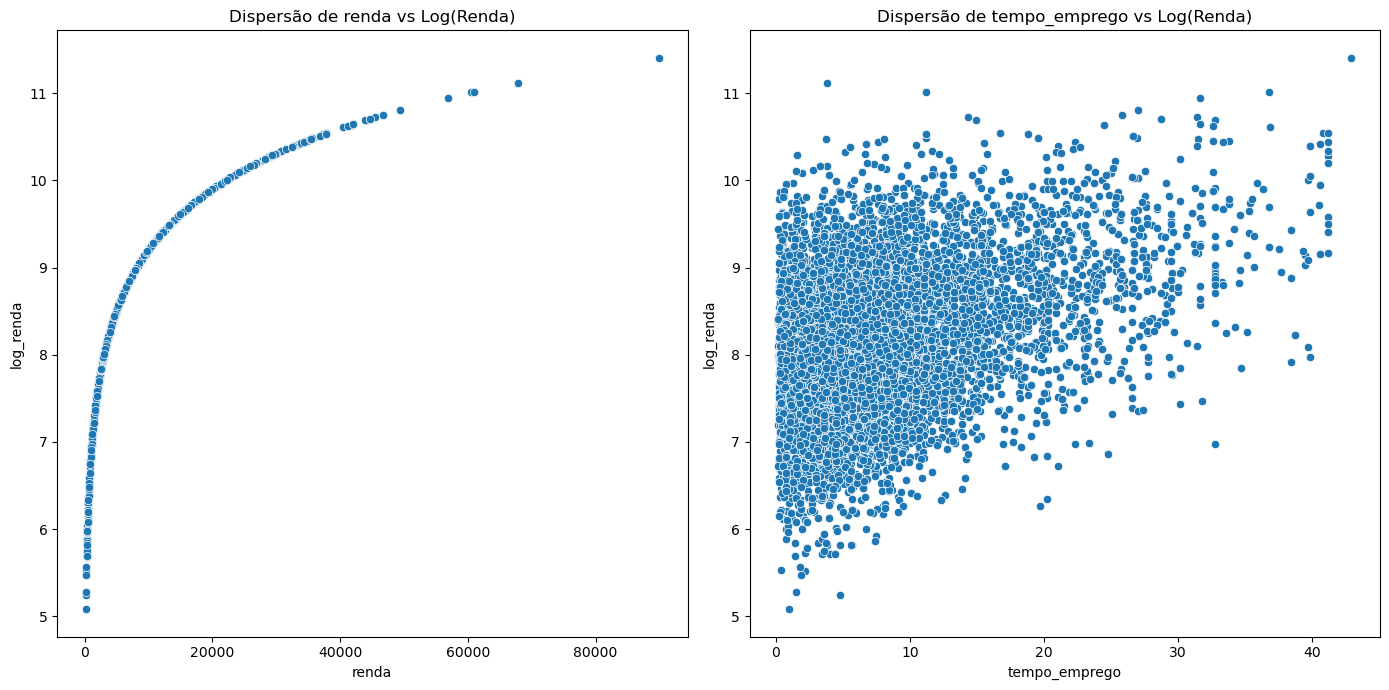

In [12]:
# Calcular o logaritmo natural da variável 'renda'
previsao_renda['log_renda'] = np.log(previsao_renda['renda'] + 1)  # adicionar 1 para evitar log(0)

# Selecionar apenas as colunas numéricas
numeric_cols = previsao_renda.select_dtypes(include=[np.number])

# Calcular a correlação entre todas as variáveis numéricas e o logaritmo da renda
correlation_matrix = numeric_cols.corr()
log_renda_correlation = correlation_matrix['log_renda'].sort_values(ascending=False)

# Identificar as duas variáveis mais correlacionadas com o logaritmo da renda, excluindo a própria log_renda
top2_log_vars = log_renda_correlation.index[1:3]  # pegar os dois primeiros índices após 'log_renda'
print("As duas variáveis mais correlacionadas com o logaritmo da renda são:", top2_log_vars)

# Criar um gráfico de dispersão para essas variáveis
plt.figure(figsize=(14, 7))

# Primeiro scatter plot
plt.subplot(1, 2, 1)
sns.scatterplot(data=previsao_renda, x=top2_log_vars[0], y='log_renda')
plt.title(f'Dispersão de {top2_log_vars[0]} vs Log(Renda)')

# Segundo scatter plot
plt.subplot(1, 2, 2)
sns.scatterplot(data=previsao_renda, x=top2_log_vars[1], y='log_renda')
plt.title(f'Dispersão de {top2_log_vars[1]} vs Log(Renda)')

plt.tight_layout()
plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

 Melhorou, pois dados que possuiam valores extremos foram suavizados, o que melhorou a robustez de análises estatísticas e modelagem, fora que a aplicação do logaritmo parece ter mantido a estrutura geral dos dados, mas tornou a distribuição mais simétrica e linear.